<a href="https://colab.research.google.com/github/lisosoma/BI_STATISTICS/blob/main/bi_hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import scipy
import itertools
from math import pi, sin, cos, sqrt, exp, log, e
import statsmodels.stats as stat

##### Задача 1

Таблица с первого слайда лекции 10.

In [ ]:
table = [[5, 9, 18, 8, 40], [13, 34, 40, 13, 100], [18, 43, 58, 21, 140]]

Также две выборки, построенные по данной таблице.

In [ ]:
table1 = [0 for i in range(140)]    # наличие/отсутствие гена А (1 или 0)
for i in range(40):
    table1[i] = 1
table2 = [0 for i in range(140)]    # баллы за тест на ителлект у мышей
for i in range(9):
    table2[i + 5] = 1
for i in range(18):
    table2[i + 5 + 9] = 2
for i in range(8):
    table2[i + 5 + 9 + 18] = 3
for i in range(34):
    table2[i + 40 + 13] = 1
for i in range(40):
    table2[i + 40 + 13 + 34] = 2
for i in range(13):
    table2[i + 80 + 13 + 34] = 3

Гипотеза H_0 -- случайные величины: наличие/отсутствие гена А и баллы за тест на интеллект у мышей, -- распределены независимо.

###### Критерий хи-квадрат.

In [ ]:
chi = 0
for i in range(2):
    for j in range(4):
        chi += (table[i][j] - table[2][j] * table[i][4] / table[2][4]) ** 2 / (table[2][j] * table[i][4])
chi *= table[2][4]

In [ ]:
if chi >= sts.chi2.ppf(q = 0.975, df = 3):
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')

Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05


###### Критерий Пирсона.

In [ ]:
p = sts.pearsonr(table1, table2)
print('Коэффициент корреляции Пирсона равен:', p[0])

Коэффициент корреляции Пирсона равен: 0.09850243798170116


In [ ]:
if sqrt(138) * p[0] / (1 - p[0] ** 2) >= sts.t.ppf(q = 0.975, df = 138):
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')

Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05


###### Критерий Спирмена.

In [ ]:
s = sts.spearmanr(table1, table2)
print('Коэффициент корреляции Спирмена равен:', s[0])

Коэффициент корреляции Спирмена равен: 0.10610827460866344


In [ ]:
if sqrt(139) * s[0] >= sts.norm.ppf(q = 0.975):
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')

Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05


###### Критерий Кендалла.

In [ ]:
k = sts.kendalltau(table1, table2)
print('Коэффициент корреляции Кенделла равен:', k[0])

Коэффициент корреляции Кенделла равен: 0.09828379769397348


In [ ]:
D_k = 2 * (2 * 140 + 5) / 9 / 140 / (140 - 1)  # нормализация статистики критерия Кендалла
if k[0] / sqrt(D_k) >= sts.norm.ppf(q = 0.975):
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')

Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05


##### Задача 2

Так как коэффициент Пирсона мало устойчив к выбросам, то сгенерируем выборку, в которой какая-то часть будет иметь обратную линейную зависимость, а некоторые пары значений будут выбросами. Коэффициент Спирмена более устойчив к выбросам, поэтому его значение для данной выборки должно быть близким к -1, в то время как коэффициент Пирсона будет положительным. Таким образом добьемся разности коэффициентов больше 1.

Коэффициент корреляции Пирсона: 0.23259867382989127
Коэффициент корреляции Спирмена: -0.8788940124682317
Разность между кк Пирсона и кк Спирмена: 1.111492686298123


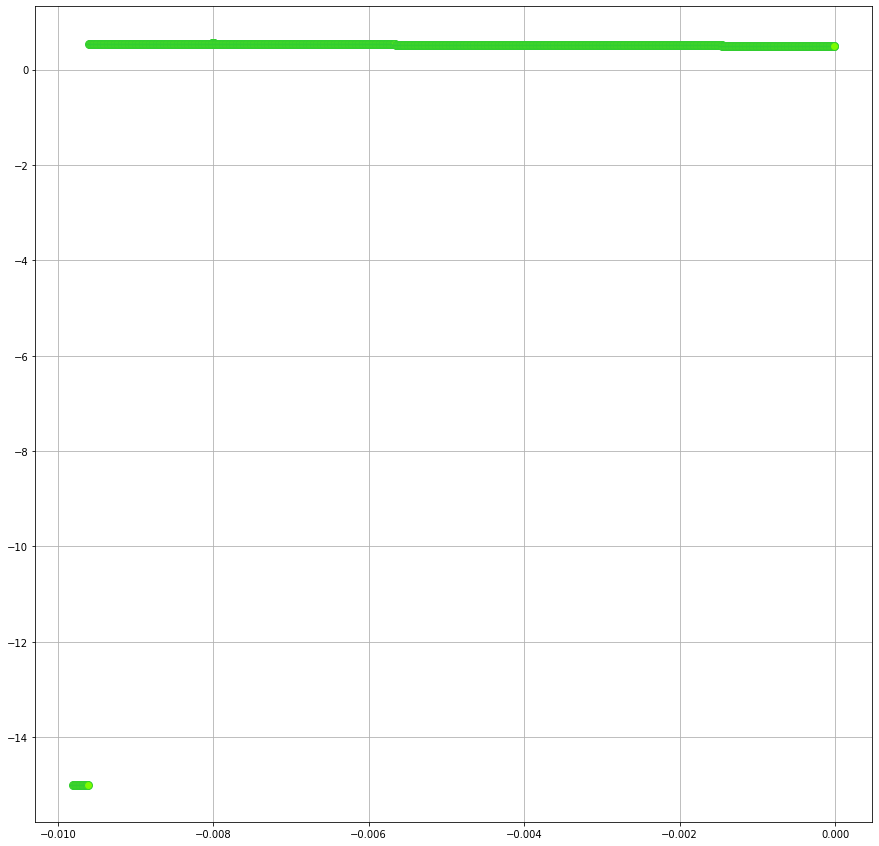

In [ ]:
x = [i * 0.001 for i in np.arange(-10, 0, 0.01)]  
n = len(x)
y = [- 5 * p + 0.5 for p in x]    # сначала устанавливаем линейную зависимость
for i in range(20):               # затем добавляем выбросы, чтобы коэффициент Пирсона не смог отреагировать на зависимость
    x[i] = -0.008 
    y[i + 20] =  - x[i + 21] ** 25 - 15
x_avg = sum(x) / n                # далее считаем выборочный коэффициент корреляции Пирсона
y_avg = sum(y) / n
x_var, y_var, xy_avg = 0, 0, 0

for i in range(n):
    x_var += (x[i] - x_avg) ** 2
    y_var += (y[i] - y_avg) ** 2
    xy_avg += (x[i] - x_avg) * (y[i] - y_avg)

r_xy = xy_avg / sqrt(x_var * y_var)
sp_xy = sts.spearmanr(x, y)      # считаем выборочный коэффициент корреляции Спирмена
print('Коэффициент корреляции Пирсона:', r_xy)
print('Коэффициент корреляции Спирмена:', sp_xy.correlation)
print('Разность между кк Пирсона и кк Спирмена:', r_xy - sp_xy.correlation)
fig = plt.figure(figsize=(15, 15))
plt.plot(x, y, color='green', linewidth = 0, marker = 'o', markersize = 8, markerfacecolor = 'lawngreen',
                markeredgecolor = 'limegreen', markeredgewidth = 1)
plt.grid()

##### Задача 3

Моделируем выборку.

In [ ]:
X = sts.expon.rvs(loc=0, scale=1, size=300)
Y = [sts.uniform.rvs(loc=0, scale=exp(-x), size=1) for x in X]

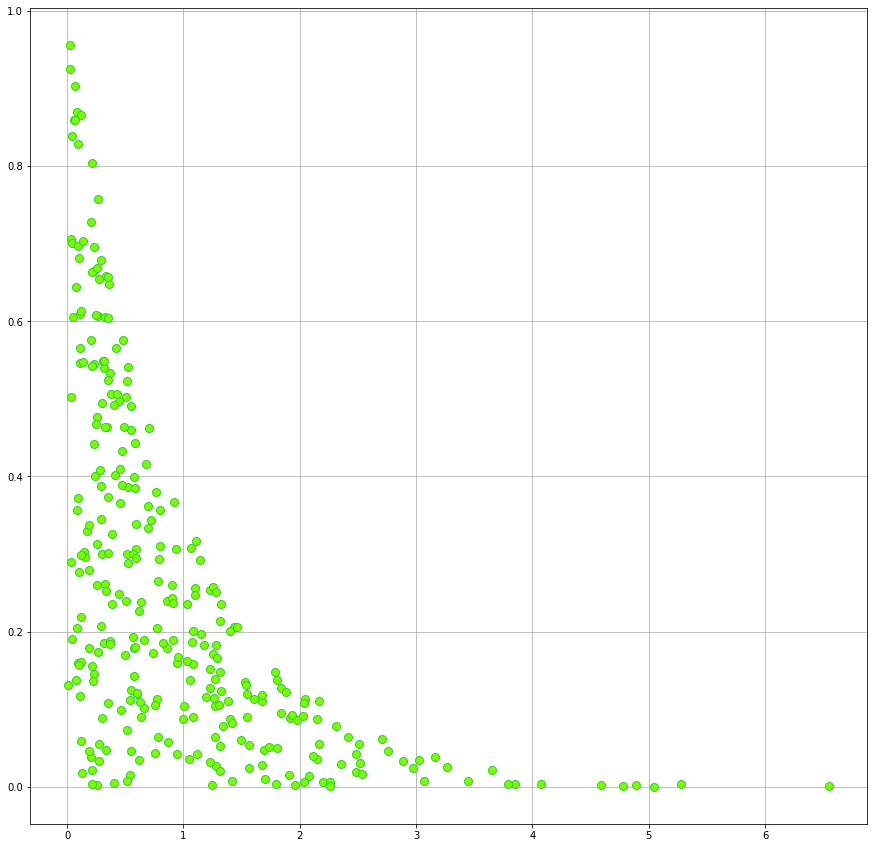

In [ ]:
fig = plt.figure(figsize=(15, 15))
plt.plot(X, Y, color='green', linewidth = 0, marker = 'o', markersize = 8, markerfacecolor = 'lawngreen',
                markeredgecolor = 'limegreen', markeredgewidth = 1)
plt.grid()

Z-преобразование Фишера.

In [ ]:
z = lambda x: log((1 + x) / (1 - x)) / 2

Применяем преобразование к гипотетическому коэффициенту корреляции.

In [ ]:
p_0 = -0.55
z_0 = z(p_0)

Считаем выборочный коэффициент Корреляции.

In [ ]:
n = 300
x_avg = sum(X) / n
y_avg = sum(Y) / n
x_var, y_var, xy_avg = 0, 0, 0
for i in range(n):
    x_var += (X[i] - x_avg) ** 2
    y_var += (Y[i] - y_avg) ** 2
    xy_avg += (X[i] - x_avg) * (Y[i] - y_avg)
p_xy = xy_avg / sqrt(x_var * y_var)
z_xy = z(p_xy)

In [ ]:
print('Выборочный коэффициент корреляции равен:', z_xy)

Выборочный коэффициент корреляции равен: -0.6426851124565811


Проверяем гипотезу (согласно 12 слайду 10 лекции).

In [ ]:
if sqrt(n - 2) * (z_xy - z_0) >= 1.96 or sqrt(n - 2) * (z_xy - z_0) <= -1.96:
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')

Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05


##### Задача 4 (b - d)

##### 4.b

Функция, моделирующая выборки и возвращающая выборочный коэффициент корреляции. На вход принимает параметры: размер выборки, значения k и r.

In [ ]:
def r_(n, k, r):
    xi, eta = [], []

    for i in range(n):
        a = sts.uniform.rvs(loc = -1, scale = 2, size = max(k , r))
        xi_i, eta_i =0, 0
        for i in range(k):
            xi_i += a[i]
        for i in range(r):
            eta_i += a[i]
        xi.append(xi_i)
        eta.append(eta_i)

    xi_avg = sum(xi) / n
    eta_avg = sum(eta) / n
    xi_var, eta_var, xe_avg = 0, 0, 0
    for i in range(n):
        xi_var += (xi[i] - xi_avg) ** 2
        eta_var += (eta[i] - eta_avg) ** 2
        xe_avg += (xi[i] - xi_avg) * (eta[i] - eta_avg)
    r_xy = xe_avg / sqrt(xi_var * eta_var)
    return r_xy

In [ ]:
print('Теоретический коэффициент коррекляции для k = 39 и r = 117 равен:', sqrt(39)/sqrt(117))
print('Выборочный коэффициент корреляции для k = 39 и r = 117 равен:', r_(100, 39, 117))

Теоретический коэффициент коррекляции для k = 39 и r = 117 равен: 0.5773502691896257
Выборочный коэффициент корреляции для k = 39 и r = 117 равен: 0.5864483304578177


##### 4.c

Для построения доверительного интервала воспользуемся снова Z-преобразованием Фишера. Следующая функция возвращает границы доверительного интервала и его длину.

In [ ]:
def conf_int(r_xy, n):
    z_l = z(r_xy) - sts.norm.ppf(q = (1 + 0.95) / 2) / sqrt(n - 3)
    z_u = z(r_xy) + sts.norm.ppf(q = (1 + 0.95) / 2) / sqrt(n - 3)
    e_1l = exp(2 * z_l) - 1
    e_2l = exp(2 * z_l) + 1
    e_1u = exp(2 * z_u) - 1
    e_2u = exp(2 * z_u) + 1
    return [e_1l / e_2l,  e_1u / e_2u, e_1u / e_2u - e_1l / e_2l]

##### 4.d

Данная функция на вход принимает значения параметров k и r и выводит график зависимости длины интервала от размера выборки n при указанных параметрах.

In [ ]:
def graphic(k, r):
    r_new = [r_(i * 10, k, r) for i in range(10, 1000, 10)]
    n_n = [i * 5 for i in range(10, 1000, 10)]
    len_r = [conf_int(r_n[i], n_n[i])[2] for i in range(99)]
    fig = plt.figure(figsize=(15, 15))
    plt.xlabel(f'n_{k, r}', fontsize=24, color='green')
    plt.ylabel('len_conf_interval', fontsize=24, color='green')
    plt.plot(n_n, len_r, color='green', linewidth = 1, marker = 'o', markersize = 8, markerfacecolor = 'lawngreen',
                markeredgecolor = 'limegreen', markeredgewidth = 1)
    plt.grid()

Построим графики для различных k и r.

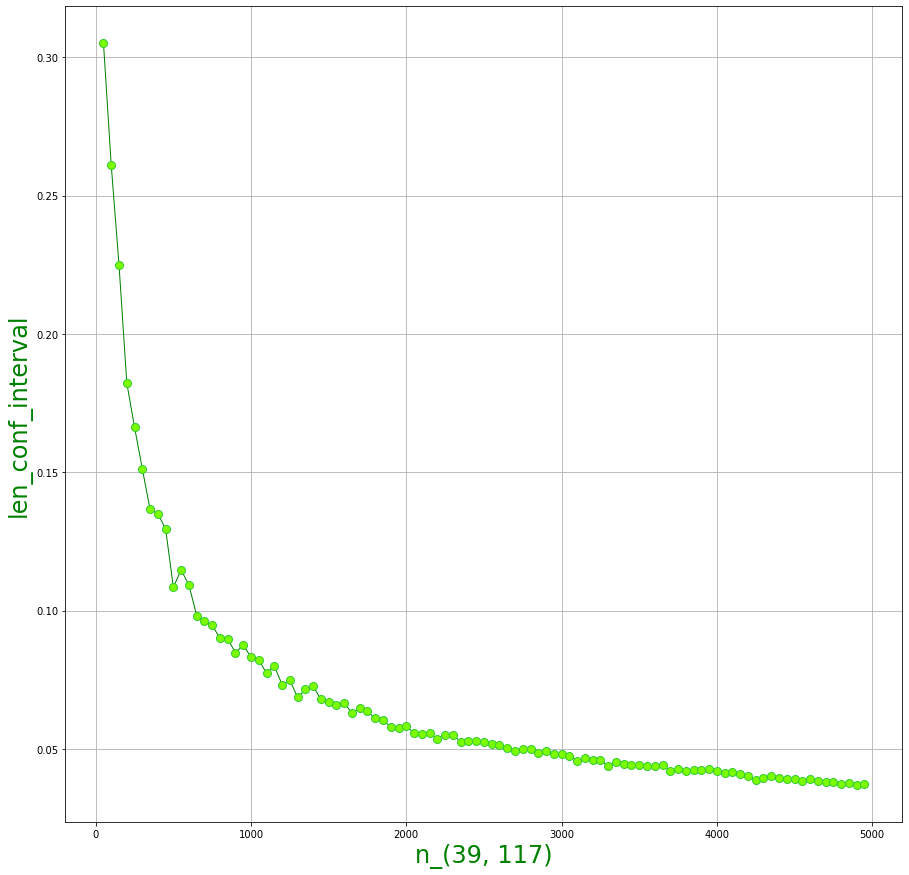

In [ ]:
graphic(39, 117)

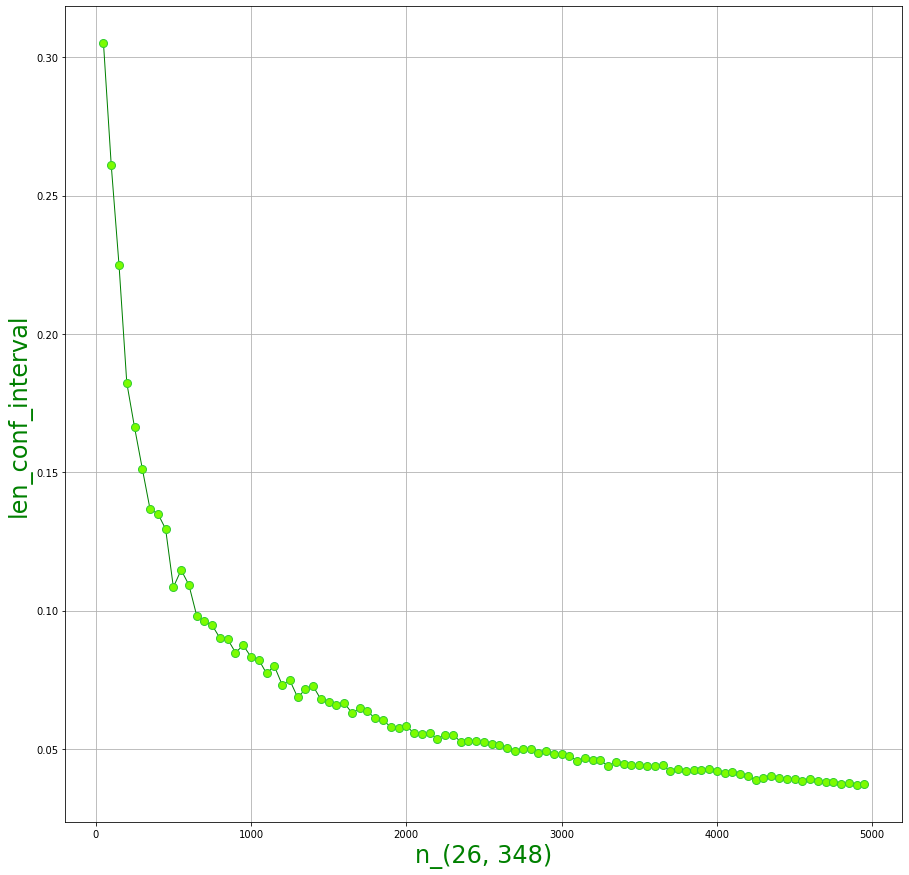

In [ ]:
graphic(26, 348)

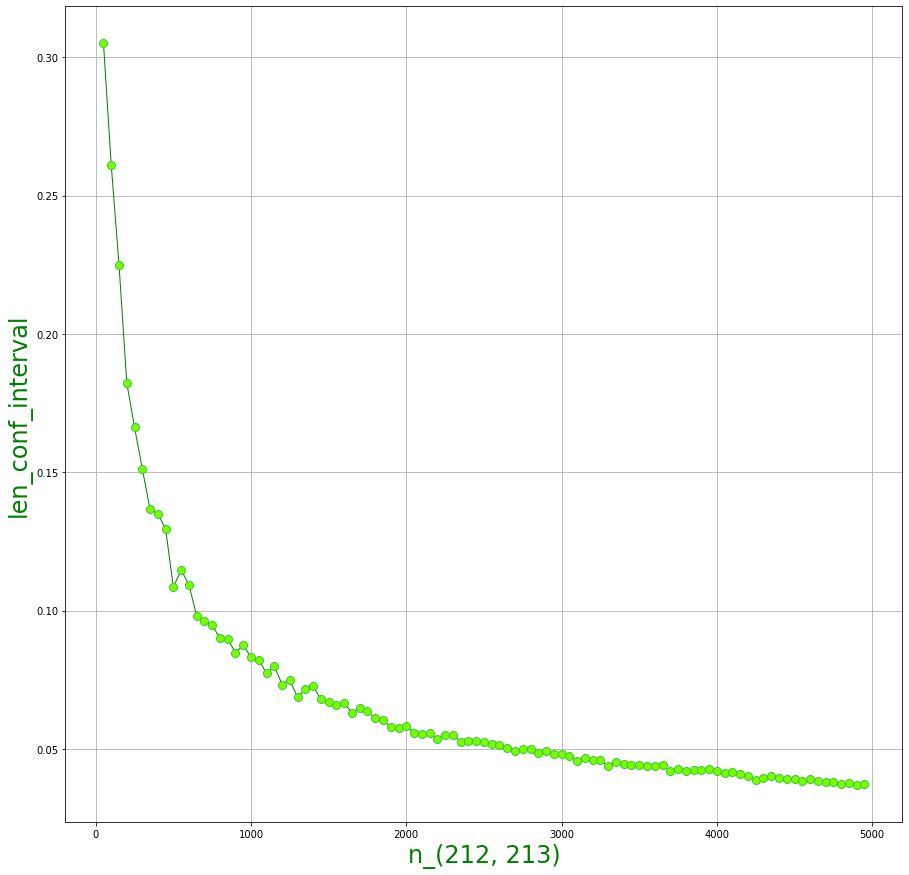

In [ ]:
graphic(212, 213)

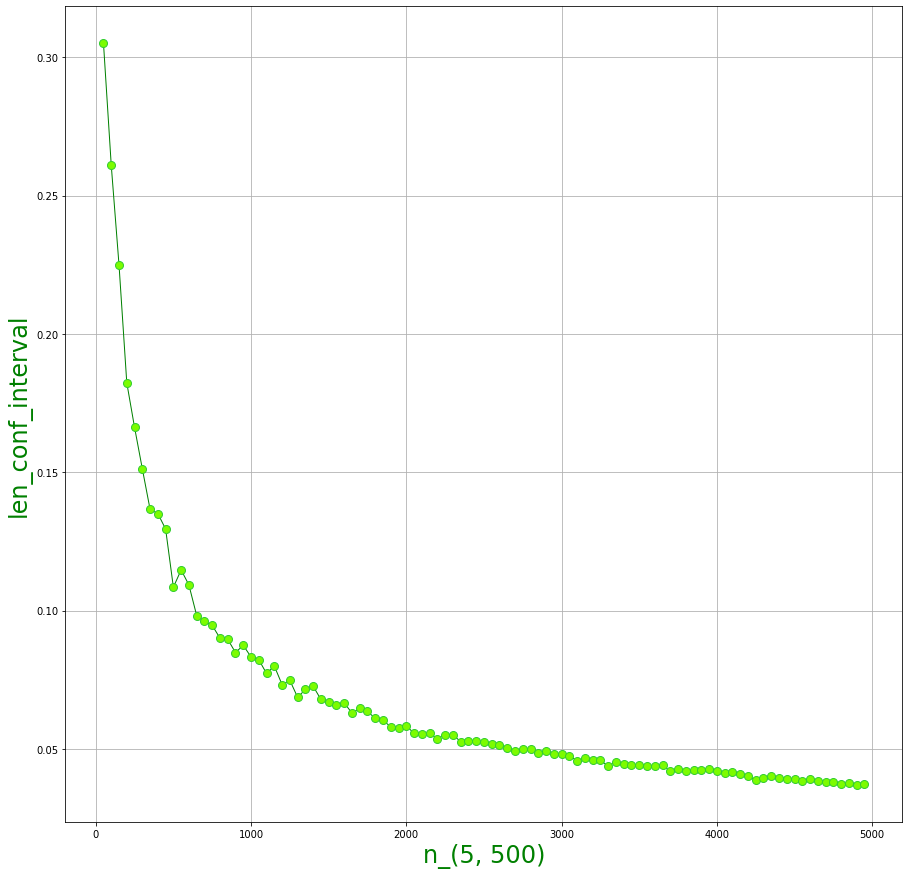

In [ ]:
graphic(5, 500)

##### Задача 5 (a, b)

##### 5.a

Функция distrib моделирует выборку из указанной в задании смеси распределений размером 170.

In [ ]:
def distrib():
    distrib = []
    uni = sts.uniform.rvs(size = 170)
    for i in range(170):
        if uni[i] <= 2/3:
            distrib.append(float(sts.norm.rvs(loc = 0, scale = 1, size = 1)))
        elif uni[i] <= 2/3 + 1/6:
            distrib.append(float(sts.expon.rvs(loc = 0, scale = 1, size = 1)))
        else:
            distrib.append(-float(sts.expon.rvs(loc = 0, scale = 1, size = 1)))
    return distrib

Смоделируем 100 таких выборок, чтобы получить выборки из p-value для критерия Колмогорова и критерия Крамера фон-Мизеса.

In [ ]:
distrib_ = [distrib() for i in range(100)]

Получим списки со значениями p-value.

In [ ]:
cfm = [sts.cramervonmises(distrib_[i], 'norm').pvalue for i in range(100)]
ks = [sts.kstest(distrib_[i], 'norm').pvalue for i in range(100)]

Рассчитаем выборочный коэффициент корреляции.

In [ ]:
n = 100
cfm_avg = sum(cfm) / n
ks_avg = sum(ks) / n
cfm_var, ks_var, ck_avg = 0, 0, 0
for i in range(n):
    ks_var += (ks[i] - ks_avg) ** 2
    cfm_var += (cfm[i] - cfm_avg) ** 2
    ck_avg += (ks[i] - ks_avg) * (cfm[i] - cfm_avg)
r_ks = ck_avg / sqrt(ks_var * cfm_var)

И построим для него 0.95-доверительный интервал.

In [ ]:
z_l = z(r_ks) - sts.norm.ppf(q = (1 + 0.95) / 2) / sqrt(n - 3)
z_u = z(r_ks) + sts.norm.ppf(q = (1 + 0.95) / 2) / sqrt(n - 3)
e_1l = exp(2 * z_l) - 1
e_2l = exp(2 * z_l) + 1
e_1u = exp(2 * z_u) - 1
e_2u = exp(2 * z_u) + 1
print('Коэффициент корреляции:', r_ks)
print('0.95-доверительный интервал для коэффициента корреляции K1 и K2:', e_1l / e_2l,  e_1u / e_2u)

Коэффициент корреляции: 0.9053835507189456
0.95-доверительный интервал для коэффициента корреляции K1 и K2: 0.8935428074765065 0.9159657498774757


##### 5.b

В данной функции будем вычислять статистику равномерно наиболее мощного критерия и возвращать значения p-value для критерия Хи-квадрат и РНМ.

In [ ]:
def chi_hom(X):
    v1 = [0 for i in range(4)]
    for x in X:
        v1[int(x) - 1] += 1
    return [sts.chisquare(X).pvalue, 1 - sts.binom.cdf(k = v1[1] + v1[2], n = 100, p = 2 / 5)]

Данная функция моделирует распределение, указанное в задании. Здесь A, G, C, U заменены 1, 2, 3, 4 для упрощения при вычислении статистики РНМ и использования библиотечной функции sts.chisquare. 

In [ ]:
def distrib5(s = 1):
    prob = [3/10, 1/5, 1/5, 3/10]                  # список со значениями функции вероятности p(xi = N)
    cumprob = list(itertools.accumulate(prob))     # список со значениями функции распределения p(xi <= N)
    
    uniform = sts.uniform.rvs(loc=0, scale=1, size=s, random_state=None)     # моделируем список случайных величин,
                                                                             # имеющих равномерное распределение на [0, 1]
        
    distrib = []       
    for i in range(s):
        for j in range(3):
            if uniform[i] <= cumprob[j + 1] and uniform[i] > cumprob[j]:     # если случайная величина из равномерного
                                                                             # распределения попадает в интервал
                distrib.append(j + 2)                                        # добавляем в список m = j + 2 (как в лекциях)
        if uniform[i] <= cumprob[0]:                                         # условие для крайнего значения
            distrib.append(1)
    return distrib

Генерируем выборку из распределения из задания и два списка со значениями p-value для критерия Хи-квадрат и РНМ критерия, соответственно.

In [ ]:
d = [distrib5(100) for i in range(100)]
p_ch = [chi_hom(d_)[0] for d_ in d]
p_u = [chi_hom(d_)[1] for d_ in d]

Далее считаем выборочный коэффцицент корреляции и строи для него доверительный интервал.

In [ ]:
n = 100
chi_avg = sum(p_ch) / n
ump_avg = sum(p_u) / n
chi_var, ump_var, cu_avg = 0, 0, 0
for i in range(n):
    chi_var += (p_ch[i] - chi_avg) ** 2
    ump_var += (p_u[i] - ump_avg) ** 2
    cu_avg += (p_ch[i] - chi_avg) * (p_u[i] - ump_avg)
r_cu = cu_avg / sqrt(chi_var * ump_var)

In [ ]:
z_l = z(r_cu) - sts.norm.ppf(q = (1 + 0.95) / 2) / sqrt(n - 3)
z_u = z(r_cu) + sts.norm.ppf(q = (1 + 0.95) / 2) / sqrt(n - 3)
e_1l = exp(2 * z_l) - 1
e_2l = exp(2 * z_l) + 1
e_1u = exp(2 * z_u) - 1
e_2u = exp(2 * z_u) + 1
print('Коэффициент корреляции:', r_cu)
print('0.95-доверительный интервал для коэффициента корреляции K1 и K2:', e_1l / e_2l,  e_1u / e_2u)

Коэффициент корреляции: -0.6863803596690983
0.95-доверительный интервал для коэффициента корреляции K1 и K2: -0.7779210732895723 -0.5663108808305439
